In [4]:
# De modo similar al ejercicio 9.2., realiza un ajuste con el método de K-medias del conjunto de datos 'mb'. Este es el conjunto de datos
# que se cargó en el ejercicio 9.1. Como son 1175 las observaciones en este caso, se prueba con un número de clusters desde K=2 hasta K=25.

In [8]:
# Comenzamos cargando el dataset en un dataframe

import pandas as pd

mb = pd.read_csv('Ejercicios_resueltos_Tema9_mb.csv')

C:\Users\migue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\migue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\migue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\migue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

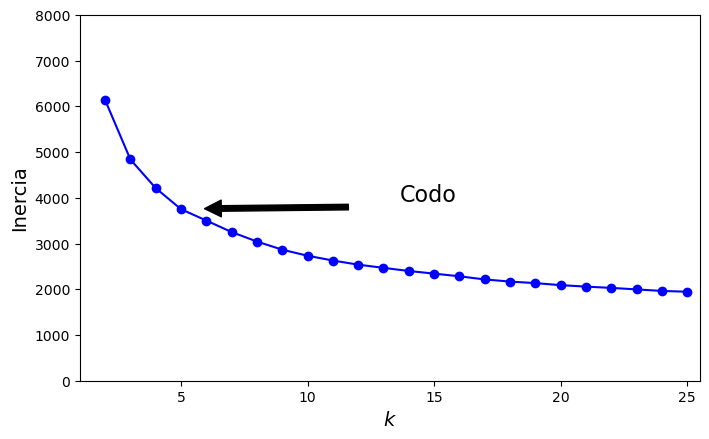

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmedias_k_mb = [KMeans(n_clusters=k, random_state=3, n_init=10).fit(mb) for k in range(2,26)]
inercias_mb = [model.inertia_ for model in kmedias_k_mb]

plt.figure(figsize=(8, 4.75))
plt.plot(range(2,26), inercias_mb, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Inercia', fontsize=14)
# Indicación del codo
plt.annotate('Codo', xy=(4, inercias_mb[3]), xytext=(0.5, 0.5), textcoords='figure fraction', fontsize=16, 
             arrowprops=dict(facecolor='black', shrink=0.2))
plt.axis([1, 25.5, 0, 8000])
plt.show()

In [31]:
# Se observa que el codo se produce para K=5
# Se emplea np.unique sobre las predicciones para obtener la tabla de frecuencias de cada grupo.
import numpy as np

kmedias_5_mb = KMeans(n_clusters=5, random_state=3, n_init=10).fit(mb)
y_pred = kmedias_5_mb.fit_predict(mb)
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts)) # Diccionario con números desde 0 hasta 4 como claves y las frecuencias de cada grupo como elementos

C:\Users\migue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\migue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


{0: 422, 1: 139, 2: 254, 3: 335, 4: 25}

In [26]:
# Repetimos el proceso anterior pero sobre el conjunto de datos mb_PC_7_df del ejercicio 9.1. (proyección sobre el espacio formado por las 7
# primeras componentes principales)
from sklearn.decomposition import PCA

pca_7 = PCA(n_components=7)
mb_PC_7 = pca_7.fit_transform(mb)
columns = ['PC'+str(i) for i in range(1,8)]
mb_PC_7_df = pd.DataFrame(data=mb_PC_7, columns=columns)
mb_PC_7_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.306603,0.034829,-0.229271,-0.451673,0.280762,0.211505,-0.170962
1,0.081369,1.001265,0.069101,-0.164533,0.321772,0.220158,0.046287
2,4.451763,2.034792,1.154947,0.372276,-0.755619,-0.136551,0.365417
3,2.773560,-5.209073,0.228254,-0.382472,-0.208599,0.044349,-1.104811
4,0.399323,0.036426,-0.743607,1.228068,0.175580,-0.250505,-0.358564
...,...,...,...,...,...,...,...
1170,1.697547,0.884256,0.716098,0.355019,-0.064594,0.190431,-0.013601
1171,-0.859846,1.241368,1.753723,-1.377576,-0.011713,0.060394,0.315103
1172,-1.043888,0.235480,-0.045429,0.125023,0.756699,-0.062044,-0.091246
1173,-2.732371,-0.550809,0.439849,0.804923,-1.067859,-0.830011,-0.061474


C:\Users\migue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\migue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\migue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\migue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

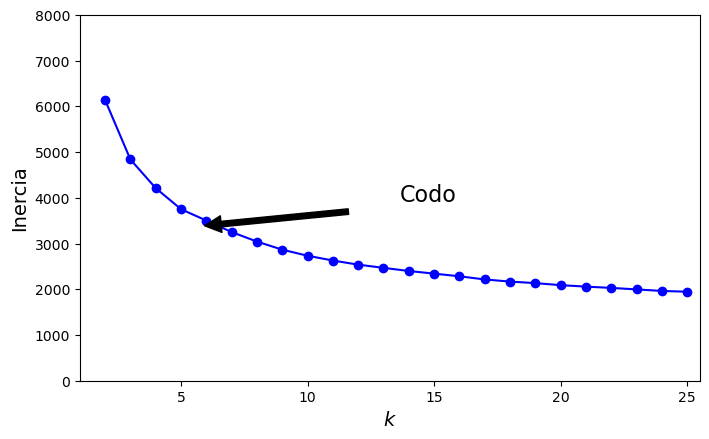

In [29]:
kmedias_k_mb_PC = [KMeans(n_clusters=k, random_state=3, n_init=10).fit(mb_PC_7_df) for k in range(2,26)]
inercias_mb_PC = [model.inertia_ for model in kmedias_k_mb_PC]

plt.figure(figsize=(8, 4.75))
plt.plot(range(2,26), inercias_mb, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Inercia', fontsize=14)
# Indicación del codo
plt.annotate('Codo', xy=(4, inercias_mb_PC[3]), xytext=(0.5, 0.5), textcoords='figure fraction', fontsize=16, 
             arrowprops=dict(facecolor='black', shrink=0.2))
plt.axis([1, 25.5, 0, 8000])
plt.show()

In [33]:
# Se observa que el codo también se da para K=5
kmedias_5_mb_PC = KMeans(n_clusters=5, random_state=3, n_init=10).fit(mb_PC_7_df)
y_pred = kmedias_5_mb_PC.fit_predict(mb_PC_7_df)
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts)) # Diccionario con números desde 0 hasta 4 como claves y las frecuencias de cada grupo como elementos

C:\Users\migue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\migue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


{0: 26, 1: 343, 2: 243, 3: 142, 4: 421}